In [749]:
%run featimp

In [384]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [385]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

# Regressor Dataset

In [398]:
boston = load_boston()
X_df = pd.DataFrame(boston.data, columns=boston.feature_names)
y_df = pd.DataFrame(boston.target, columns=["target"])
df=pd.concat([X_df, y_df], axis=1, sort=False)

In [399]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data-based importance strategies:

## Ranking features by their Spearman's rank correlation coefficient

#### Spearman's rank correlation heatmap:

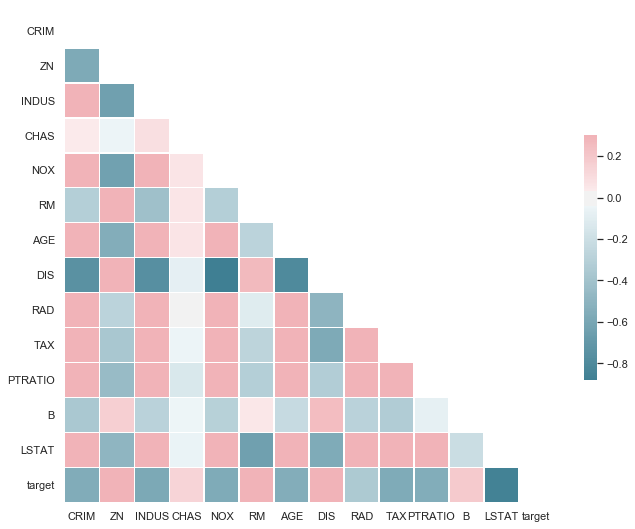

In [400]:
corr=plot_spearman_rank_matrix(df)

#### Ranking features by their Spearman's rank correlation coefficient

In [401]:
imp_score=corr[['target']]
imp_score['target1']=np.abs(imp_score['target'])
imp_score.sort_values(by='target1',ascending=False)[['target']]

,target
target,1.000000
LSTAT,-0.852914
RM,0.633576
INDUS,-0.578255
NOX,-0.562609
TAX,-0.562411
CRIM,-0.558891
PTRATIO,-0.555905
AGE,-0.547562
DIS,0.445857


This method is measuring single-feature relevance importance and works well for independent features, but **suffers in the presence of codependent features**.<br>
Groups of features with similar relationships to the response variable receive the same or similar ranks, even though just one should be considered important.<br>
From our Spearman rank plot we can see that some features are highly correlated with each other like *DIS is highly correlated with RM and Age*. So, this is not efficient measure for feature importance ranking

## PCA- Principle Component Analysis 

PCA transforms data into a new space characterized by eigenvectors and identifies features that explain the most variance in the new space. If the first principal component covers a large percentage of the variance, the "loads" associated with that component can indicate importance of features in the original X space.

In [402]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

In [403]:
perform_PCA(df,features)

explained_variance_ratio: [0.47129606 0.11025193 0.0955859 ]
components: [[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924257
   0.3136706  -0.32154387  0.31979277  0.33846915  0.20494226 -0.20297261
   0.30975984]
 [-0.31525237 -0.3233129   0.11249291  0.45482914  0.21911553  0.14933154
   0.31197778 -0.34907    -0.27152094 -0.23945365 -0.30589695  0.23855944
  -0.07432203]
 [ 0.24656649  0.29585782 -0.01594592  0.28978082  0.12096411  0.59396117
  -0.01767481 -0.04973627  0.28725483  0.22074447 -0.32344627 -0.3001459
  -0.26700025]]


'CRIM'=0.2509514, 'ZN'=-0.25631454, 'INDUS'=0.34667207, 'CHAS'=0.00504243, 'NOX'=0.34285231, 'RM'=-0.18924257, 
'AGE'=0.3136706, 'DIS'=-0.32154387, 'RAD'=0.31979277,'TAX'=0.33846915, 'PTRATIO'=0.20494226, 'B'=-0.20297261, 'LSTAT'=0.30975984

This method shows that if we transform data into 3 principal componenents, 58% of the variance is explained by 2 components. Principal component is responsible for 47% of variance and according to principal component, the variance contributed by each feature is as shown in first array. According to it, features like INDUS, NOX,DIS, TAX, LSTAT are more important tham features like CHAS, RM

## minimal-redundancy-maximal-relevance (mRMR)

In an effort to deal with codependencies, data analysis techniques rank features not just by relevance (correlation with the response variable) but also by low redundancy, the amount of information shared between codependent features

In [404]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


In [405]:
spearman_corr_matrix = corr
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
target='target'

#### Ranking features by their mRMR(using Spearman's rank coefficient)

In [406]:
imp_dict = get_mRMR_dict(features, target, spearman_corr_matrix)
imp_score_mRMR=pd.DataFrame(imp_dict, index=[0]).T
imp_score_mRMR['target1']=np.abs(imp_score_mRMR[0])
imp_score_mRMR.sort_values(by='target1',ascending=False)[[0]]

,0
LSTAT,-1.020173
CRIM,-0.798328
RM,0.792683
DIS,0.786940
TAX,-0.784909
NOX,-0.780815
INDUS,-0.777200
AGE,-0.743498
PTRATIO,-0.688662
ZN,0.678640


**We can see that the feature ranking amongst variables vary if we use mRMR rather than only ranking based on Spearman's rank coefficient**

# Model-based importance strategies

In [508]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [560]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=99)
X_train, y_train = df_train.drop('target',axis=1), df_train['target']
X_test, y_test = df_test.drop('target',axis=1), df_test['target']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

## Drop-column importance

Procedure:
1. Compute metric for model trained on all features using validation set
2. Drop column !"
3. Retrain model
4. Compute metric using validation set
5. Importance score is the drop in metric

In [562]:
rf_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1,
                            max_features=1.0,
                            min_samples_leaf=10, oob_score=True)

In [563]:
feature_imp_df = dropcol_importances(rf_reg, X_train, y_train, X_test,
                                     y_test)

In [564]:
%R -i feature_imp_df

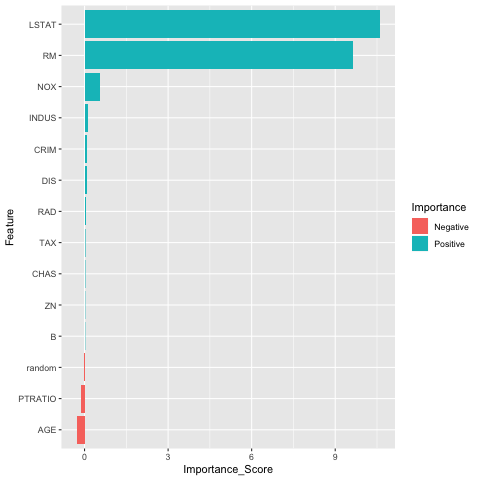

In [565]:
%%R
ggplot(data=feature_imp_df, aes(x = reorder(feature,Importance_Score), 
                                y = Importance_Score, fill = Importance),
          color = "white",                           
          x.text.angle = 90,         
          ggtheme = theme_minimal()
          )+ xlab("Feature")+
geom_bar(stat = "identity")+ coord_flip()

We have also introduced a **'random'** column which contains random values. We can see that the importance score associated with this column is almost zero. We can safely say that columns having scores less than random column should be disregarded.  

Disadvantages of drop-column importance technique:<br>
Very expensive because it means retraining the model p times for p features.<br>
Codependent features often result in 0 or very low importance.<br>
eg. **DIS** was higly correlated with other features, its importance_score is coming to be almost zero.

## Permutation importance

Procedure:
1. Compute metric for model trained on all features using validation set
2. Permute column !"
3. Compute metric using validation set
4. Importance score is the drop in metric

In [566]:
rf_reg_perm = RandomForestRegressor(n_estimators=100, n_jobs=-1,
                            max_features=1.0,
                            min_samples_leaf=10, oob_score=True)

In [567]:
feature_imp_df_perm=permutation_importances(rf_reg_perm, X_train, y_train,
                                            X_test, y_test)

In [568]:
%R -i feature_imp_df_perm

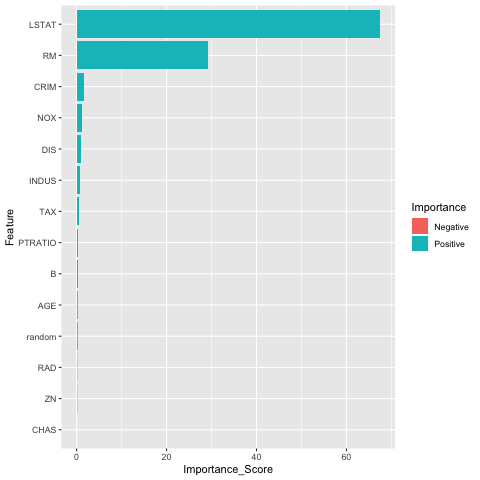

In [569]:
%%R
ggplot(data=feature_imp_df_perm, aes(x = reorder(feature,Importance_Score),
                                     y = Importance_Score, fill = Importance),
          color = "white",                           
          x.text.angle = 90,         
          ggtheme = theme_minimal()
          )+ xlab("Feature")+
geom_bar(stat = "identity")+ coord_flip()

Features:<br>
No need to retrain the model so much more efficient than drop column importance<br>
Codependent features often share importance.<br> 

**Observations:**

Drop-column tends to show low importance scores and permutation
tends to share importance scores for codependent features
Eg. **DIS** and **NOX** - were highly correlated and sharing importance but DIS importance almost dropped to zero in drop-column importance.

Importance score of **random** column was negative in drop-column importance but is zero in permutation importance mechanism.
    

# Show the effect of duplicated column:

In [529]:
df_train_dup = df_train
df_test_dup = df_test
#Duplicating the RM column
df_train_dup['RM_dup']=df_train_dup['RM']
df_test_dup['RM_dup']=df_test_dup['RM']

In [524]:
X_train_dup, y_train_dup = df_train_dup.drop('target',axis=1), df_train_dup['target']
X_test_dup, y_test_dup = df_test_dup.drop('target',axis=1), df_test_dup['target']

In [525]:
feature_imp_df_dup = dropcol_importances(rf_reg, X_train_dup, y_train_dup, X_test_dup, y_test_dup)
%R -i feature_imp_df_dup

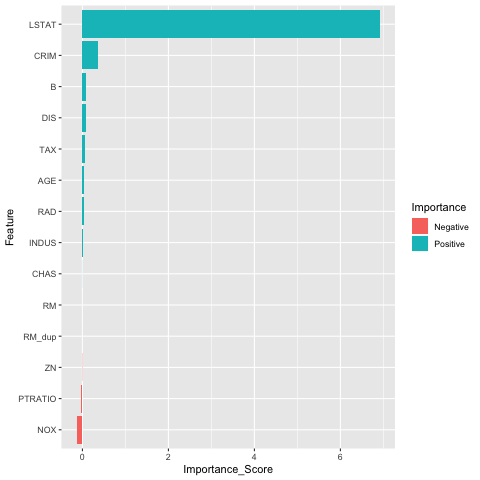

In [526]:
%%R
ggplot(data=feature_imp_df_dup, aes(x = reorder(feature,Importance_Score), y = Importance_Score, fill = Importance),
          color = "white",                           
          x.text.angle = 90,         
          ggtheme = theme_minimal()
          )+ xlab("Feature")+
geom_bar(stat = "identity")+ coord_flip()

In [527]:
feature_imp_df_perm_dup=permutation_importances(rf_reg_perm,
                        X_train_dup, y_train_dup, X_test_dup, y_test_dup)
%R -i feature_imp_df_perm_dup

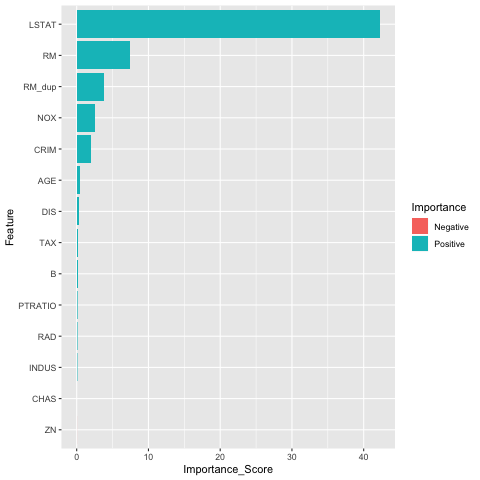

In [528]:
%%R
ggplot(data=feature_imp_df_perm_dup, aes(x = reorder(feature,Importance_Score),
                                y = Importance_Score, fill = Importance),
          color = "white",                           
          x.text.angle = 90,         
          ggtheme = theme_minimal()
          )+ xlab("Feature")+
geom_bar(stat = "identity")+ coord_flip()

We can see that :<br>
**drop-column importance:** importance score of duplicated columns drop to zero.<br>
**permutation importance:** importance score of duplicated columns is pulled down but not dropped to zero.<br>
eg. **RM and RM_dup**

# Automatic feature selection algorithm

**Algorithm:**<br>
1.> Have an ordering of features from most to least important.<br>
2.> Get a baseline validation metric appropriate for a classifier or a regressor with all features.<br>
3.> Drop the lowest importance feature and retrain the model and re-compute the validation metric.<br>
4.> If the validation metric starts getting worse, then stop the process.

In [573]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [597]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=99)
X_train, y_train = df_train.drop('target',axis=1), df_train['target']
X_test, y_test = df_test.drop('target',axis=1), df_test['target']

In [598]:
#Get the order of feature importance using permutation_importances
feature_imp_df_perm=permutation_importances(rf_reg_perm, X_train, y_train, X_test, y_test)

In [599]:
rev_feature_list=np.flip(feature_imp_df_perm.iloc[:,0].values)
rev_feature_list=rev_feature_list.tolist()
rev_feature_list

['CHAS',
 'ZN',
 'RAD',
 'B',
 'PTRATIO',
 'TAX',
 'INDUS',
 'AGE',
 'DIS',
 'CRIM',
 'NOX',
 'RM',
 'LSTAT']

In [601]:
important_features, non_important_features = auto_feature_selection(
    model, X_train, y_train, X_test, y_test, rev_feature_list)
print("important_features:", important_features)
print("non_important_features:", non_important_features)

important_features: ['B', 'PTRATIO', 'TAX', 'INDUS', 'AGE', 'DIS', 'CRIM', 'NOX', 'RM', 'LSTAT']
non_important_features: ['CHAS', 'ZN', 'RAD']


So, we will drop 3 features and keep the remaining ones.

# Comparison between feature importances of linear regressor, random forest and xgBoost:

In [721]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
xg_reg = xgboost.XGBRegressor(objective ='reg:squarederror', 
                              colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 100)
rf_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1,
                            max_features=1.0,
                            min_samples_leaf=10, oob_score=True)

In [722]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=99)
X_train, y_train = df_train.drop('target',axis=1), df_train['target']
X_test, y_test = df_test.drop('target',axis=1), df_test['target']
important_features: ['B', 'PTRATIO', 'TAX', 'INDUS', 'AGE', 'DIS', 'CRIM',
                     'NOX', 'RM', 'LSTAT']
X_train=X_train[important_features]
X_test=X_test[important_features]
feature_imp_df_lin = permutation_importances(rf_reg, X_train, y_train,
                                             X_test, y_test)
feature_imp_df_rf = permutation_importances(linear_reg, X_train, y_train,
                                            X_test, y_test)
feature_imp_df_xgboost = permutation_importances(xg_reg, X_train, y_train,
                                                 X_test, y_test)

In [734]:
feature_imp_df_xgboost['feature'].tolist()

['LSTAT', 'RM', 'PTRATIO', 'TAX', 'B', 'INDUS', 'NOX', 'AGE', 'CRIM', 'DIS']

In [711]:
feature_imp_df_lin['lin_rank'] = -np.arange(len(feature_imp_df_lin))
feature_imp_df_lin = feature_imp_df_lin.drop(['Importance_Score',
                                              'Importance'],axis=1)

feature_imp_df_rf['rf_rank'] = -np.arange(len(feature_imp_df_rf))
feature_imp_df_rf = feature_imp_df_rf.drop(['Importance_Score',
                                            'Importance'],axis=1)

feature_imp_df_xgboost['xg_rank'] = -np.arange(len(feature_imp_df_xgboost))
feature_imp_df_xgboost = feature_imp_df_xgboost.drop(['Importance_Score'
                                                      ,'Importance'],axis=1)
feature_imp_df=pd.merge(feature_imp_df_rf, feature_imp_df_xgboost,
                        how='left', on=['feature'])
feature_imp_df=pd.merge(feature_imp_df, feature_imp_df_lin,
                        how='left', on=['feature'])
feature_imp_df

,feature,rf_rank,xg_rank,lin_rank
0,LSTAT,0,-1,0
1,RM,-1,0,-1
2,DIS,-2,-9,-4
3,PTRATIO,-3,-2,-5
4,NOX,-4,-6,-3
5,B,-5,-5,-8
6,TAX,-6,-3,-9
7,AGE,-7,-8,-6
8,INDUS,-8,-4,-7
9,CRIM,-9,-7,-2


In [712]:
%R -i feature_imp_df

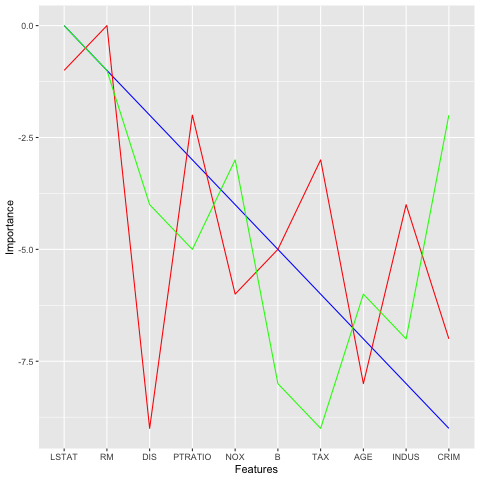

In [717]:
%%R
ggplot() + 
  geom_line(data = feature_imp_df, aes(x = reorder(feature,-rf_rank),
                                       y = rf_rank, group = 1), 
                                    color = "blue") +
  geom_line(data = feature_imp_df, aes(x = feature,
                                       y = xg_rank, group = 1), 
                                    color = "red") +
  geom_line(data = feature_imp_df, aes(x = feature,
                                       y = lin_rank, group = 1),
                                    color = "green") +  
  xlab('Features') +
  ylab('Importance')

We can see that **ranking differs** among different models.<br> 
Therefore, we can say that features determined for one model do not export well to other models.

## Comparisons with SHAP for Random forest and XGBoost

In [ ]:
# Citation :https://towardsdatascience.com/

### For XGBoost:

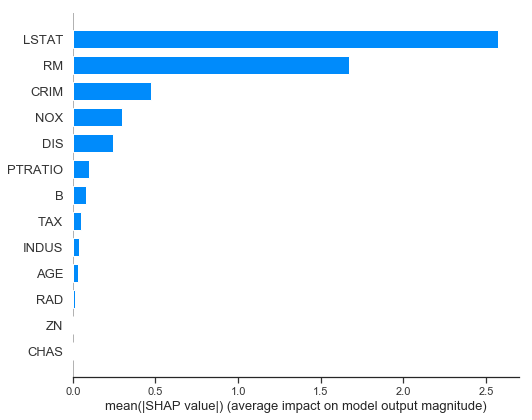

In [718]:
import xgboost
import shap

shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01},
                      xgboost.DMatrix(X, label=y), 100)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

For XGBoost:<br>
With SHAP: ['LSTAT','RM', 'CRIM', 'NOX', 'DIS', 'PTRATIO', 'B', 'TAX', 'INDUS', 'AGE']<br>
With permutation importance ['LSTAT', 'RM', 'PTRATIO', 'TAX', 'B', 'INDUS', 'NOX', 'AGE', 'CRIM', 'DIS']<br>

Therefore, order varies slightly

### For Random Forest:

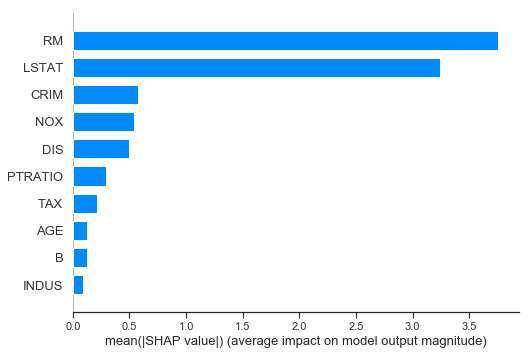

In [728]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X[important_features], y)
shap_values = shap.TreeExplainer(model).shap_values(X[important_features])
shap.summary_plot(shap_values, X[important_features], plot_type="bar")

#### Computing SHAP on all features

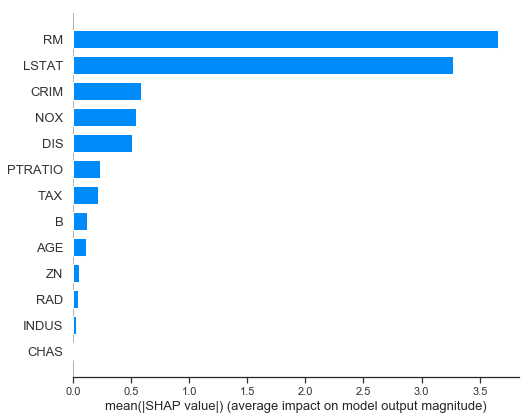

In [733]:
model.fit(X, y)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

For Random Forest:<br>
With SHAP: ['RM', 'LSTAT', 'CRIM', 'NOX', 'DIS', 'PTRATIO', 'TAX', 'AGE', 'B', 'INDUS'] <br>
With permutation importance ['LSTAT', 'RM', 'DIS', 'PTRATIO', 'NOX', 'B', 'TAX', 'AGE', 'INDUS', 'CRIM']<br>
 Therefore, order of features differ for SHAP and permutation importance<br>
But an important observation is **least important features matches for SHAP and permutation importance**

# Classifier Dataset

In [826]:
wine = load_wine()
X_df_wine=pd.DataFrame(wine.data, columns=wine.feature_names)
y_df_wine = pd.DataFrame(wine.target, columns=["target"])
df_wine=pd.concat([X_df_wine, y_df_wine], axis=1, sort=False)

In [827]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [828]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

In [829]:
df_train, df_test = train_test_split(df_wine, 
                        test_size=0.20, random_state=99)
X_train, y_train = df_train.drop('target',axis=1), df_train['target']
X_test, y_test = df_test.drop('target',axis=1), df_test['target']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

In [830]:
feature_imp_df = permutation_importances(rf, X_train, y_train, X_test, y_test)

In [831]:
feature_imp_df

,feature,Importance_Score,Importance
6,flavanoids,0.194444,Positive
12,proline,0.166667,Positive
9,color_intensity,0.083333,Positive
11,od280/od315_of_diluted_wines,0.027778,Positive
0,alcohol,-0.000000,Negative
1,malic_acid,-0.000000,Negative
2,ash,-0.000000,Negative
3,alcalinity_of_ash,-0.000000,Negative
4,magnesium,-0.000000,Negative
5,total_phenols,-0.000000,Negative


In [832]:
%R -i feature_imp_df

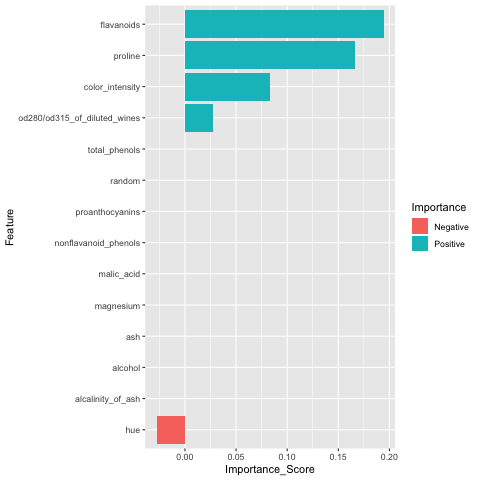

In [833]:
%%R
ggplot(data=feature_imp_df, aes(x = reorder(feature,Importance_Score),
                                y = Importance_Score, fill = Importance),
          color = "white",                           
          x.text.angle = 90,         
          ggtheme = theme_minimal()
          )+ xlab("Feature")+
geom_bar(stat = "identity")+ coord_flip()

**We can see that feature importances for most of the columns is zero or negative below random column**